# Trabajo Práctico 1 - Inferencia Estadística y Reconocimiento de Patrones



# Primero, importamos todas las librerias necesarias:

In [3]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis                 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import label_binarize

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gráficos de barras de muestreo *absoluto* y *porcentual*

Tabla de distribución de la variable 'quality':

         Frecuencia absoluta  Porcentaje (%)
quality                                     
3                         10            0.63
4                         53            3.31
5                        681           42.59
6                        638           39.90
7                        199           12.45
8                         18            1.13


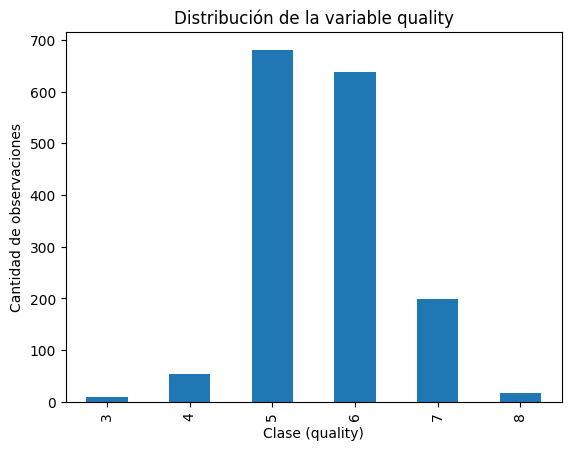

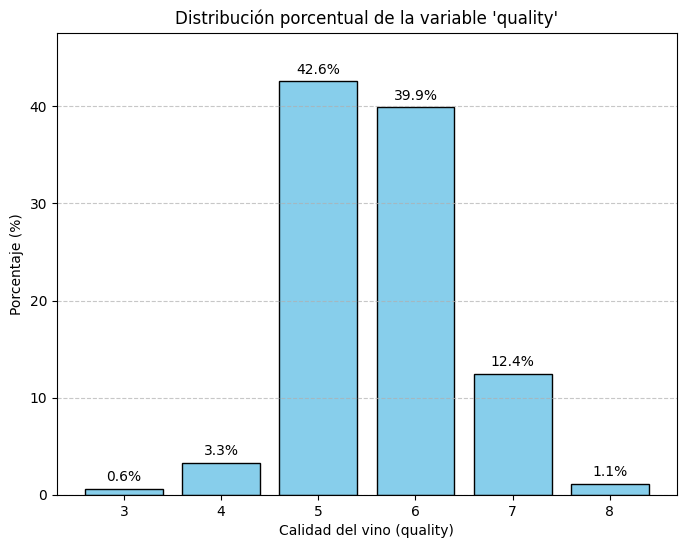

In [4]:
# Cargamos los datos
df = pd.read_csv('winequality-red.csv', sep=';')

# Conteo de clases y porcentaje de cada clase
counts = df["quality"].value_counts().sort_index()
percentages = counts / counts.sum() * 100

# Crear tabla resumen
tabla = pd.DataFrame({
    "Frecuencia absoluta": counts,
    "Porcentaje (%)": percentages.round(2)
})

print("Tabla de distribución de la variable 'quality':\n")
print(tabla)
 
# Gráfico de barras de muestreo absoluto
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Clase (quality)')
plt.ylabel('Cantidad de observaciones')
plt.title('Distribución de la variable quality')
plt.show()


# Gráfico de barras de muestreo porcentual
plt.figure(figsize=(8,6))
bars = plt.bar(counts.index, percentages, color="skyblue", edgecolor="black")

# Etiquetas de porcentaje en cada barra
for bar, pct in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{pct:.1f}%", ha="center", va="bottom", fontsize=10)

plt.title("Distribución porcentual de la variable 'quality'")
plt.xlabel("Calidad del vino (quality)")
plt.ylabel("Porcentaje (%)")
plt.ylim(0, max(percentages) + 5)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


* SEPARAMOS LAS VARIABLES PREDICTORAS Y DE RESPUESTA
* USAMOS UN CONJUNTO DE ENTRENAMIENTO 80/20
* Y POR ULTIMO ESCALAMOS Y BALANCEAMOS

In [5]:
# Separar predictoras y respuesta
X = df.drop("quality", axis=1)
y = df["quality"]

# Split 80-20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalado ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balanceo SOLO en entrenamiento ---
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

#Binarizado (servirá para curva ROC)
classes = sorted(set(y_test))  # Asegura orden correcto
y_test_bin = label_binarize(y_test, classes=classes)


* Creamos una funcion para registrar las metricas (para mas adelante)

In [6]:
# Función para registrar métricas
metricas_modelos = {}
def registrar_metricas(modelo, y_true, y_pred):
    metricas_modelos[modelo] = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="macro"),
        "Recall": recall_score(y_true, y_pred, average="macro"),
        "F1 Score": f1_score(y_true, y_pred, average="macro"),
        }
    print(f"\n--- {modelo} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (macro): ", precision_score(y_true, y_pred, average='macro'))
    print("Recall (macro): ", recall_score(y_true, y_pred, average='macro'))
    print("F1-score (macro): ", f1_score(y_true, y_pred, average='macro'))


# REGRESION LOGISTICA

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\User


--- Logística ---
Accuracy: 0.590625
Precision (macro):  0.3116984215069676
Recall (macro):  0.2728860294117647
F1-score (macro):  0.27762808067026984
AUC (macro):  0.7639904835106219

--- Logística Balanceada ---
Accuracy: 0.40625
Precision (macro):  0.26461256805459704
Recall (macro):  0.2596549131016043
F1-score (macro):  0.24246451603405894
AUC (macro):  0.692943495071285

Reporte de clasificación Logistica:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.62      0.73      0.67       136
           6       0.54      0.61      0.57       128
           7       0.71      0.30      0.42        40
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.31      0.27      0.28       320
weighted avg       0.57      0.59      0.57       320


Reporte de clasificación Logistica bal

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Pyth

Accuracy medio CV (5 folds, balanceado): 0.5923547400611622


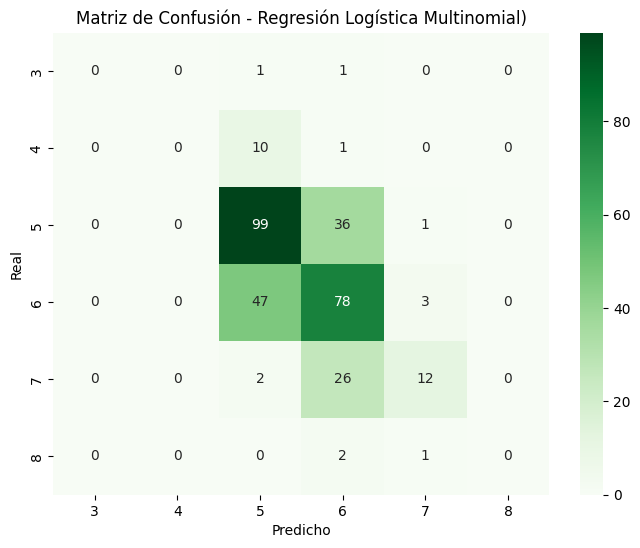

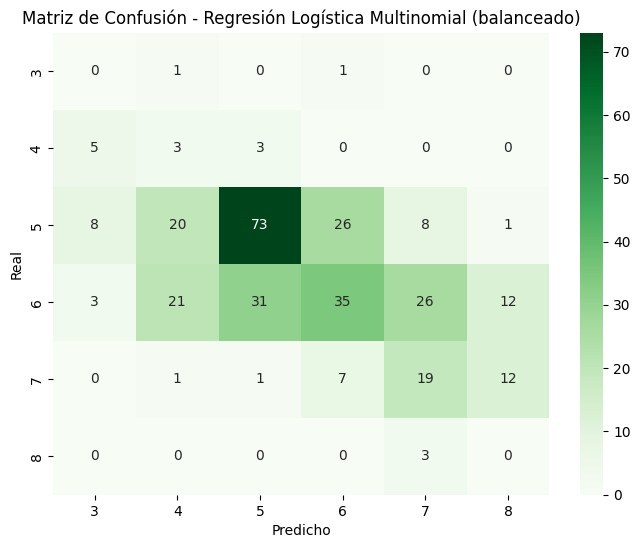

In [7]:
# Modelo Regresión Logística Multinomial 
log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train_scaled, y_train)

#Balanceado
log_reg_bal = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)
log_reg_bal.fit(X_train_bal, y_train_bal)

# Predicciones 
y_pred_log=log_reg.predict(X_test_scaled)
y_pred_log_bal = log_reg_bal.predict(X_test_scaled)

# Area bajo la curva ROC
y_score_log_reg = log_reg.predict_proba(X_test_scaled)
y_score_log_reg_bal = log_reg_bal.predict_proba(X_test_scaled)
auc_log_reg = roc_auc_score(y_test_bin, y_score_log_reg, average='macro')
auc_log_reg_bal = roc_auc_score(y_test_bin, y_score_log_reg_bal, average='macro')

#Metricas
registrar_metricas("Logística", y_test, y_pred_log)
print("AUC (macro): ", auc_log_reg)
registrar_metricas("Logística Balanceada", y_test, y_pred_log_bal)
print("AUC (macro): ", auc_log_reg_bal)

# Evaluación 
print("\nReporte de clasificación Logistica:\n", classification_report(y_test, y_pred_log,zero_division=0))
print("\nReporte de clasificación Logistica balanceado:\n", classification_report(y_test, y_pred_log_bal,zero_division=0))

# Validación cruzada en el set balanceado
scores_log = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, no balanceado):", scores_log.mean())
scores_log_bal = cross_val_score(log_reg_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, balanceado):", scores_log_bal.mean())

# Matrices de confusión 
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8,6))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.sort(np.unique(y)),
            yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística Multinomial)")
plt.show()

cm_log_bal = confusion_matrix(y_test, y_pred_log_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_log_bal, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.sort(np.unique(y)),
            yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística Multinomial (balanceado)")
plt.show()


# KNN (ESTANDARIZADA Y BALANCEADA)

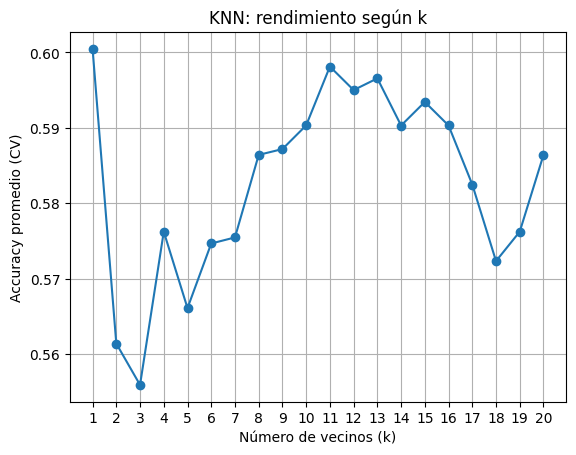

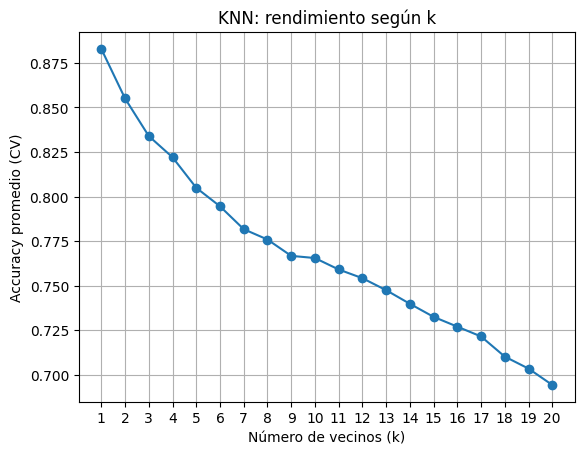


--- KNN ---
Accuracy: 0.625
Precision (macro):  0.36296863395500956
Recall (macro):  0.401361036838978
F1-score (macro):  0.37621348694323836
AUC (macro):  0.6540949502546569

Reporte de clasificación (balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.18      0.16        11
           5       0.74      0.66      0.70       136
           6       0.64      0.66      0.65       128
           7       0.49      0.57      0.53        40
           8       0.17      0.33      0.22         3

    accuracy                           0.62       320
   macro avg       0.36      0.40      0.38       320
weighted avg       0.64      0.62      0.63       320

Accuracy medio CV (5 folds, balanceado): 0.882874617737003


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

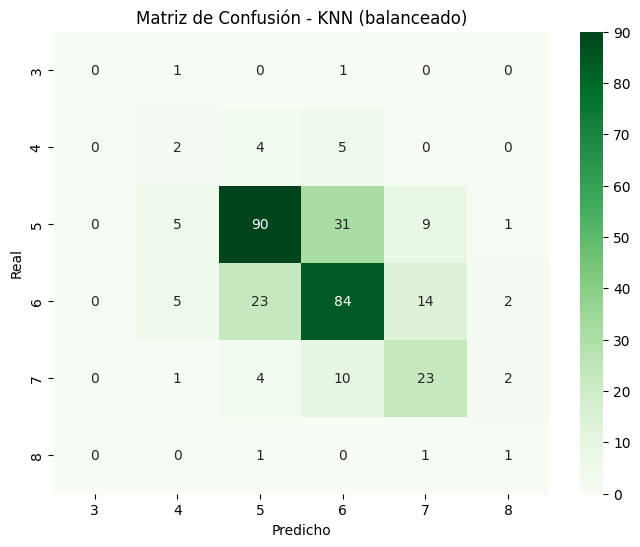

In [8]:
# Modelo KNN 
# Probar k de 1 a 20
k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    scores.append(score.mean())

# Visualizar
plt.plot(k_range, scores, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Accuracy promedio (CV)')
plt.title('KNN: rendimiento según k')
plt.xticks(k_range) 
plt.grid(True)
plt.show()

scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_bal, y_train_bal, cv=5, scoring='accuracy')
    scores.append(score.mean())

# Visualizar
plt.plot(k_range, scores, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Accuracy promedio (CV)')
plt.title('KNN: rendimiento según k')
plt.xticks(k_range) 
plt.grid(True)
plt.show()

#Obtenemos que el mejor accuracy lo obtenemos para k=1 en el balanceado

knn_bal = KNeighborsClassifier(n_neighbors=1)
knn_bal.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_knn_bal = knn_bal.predict(X_test_scaled)


# Area bajo la curva ROC
y_score_knn = knn_bal.predict_proba(X_test_scaled)
auc_knn = roc_auc_score(y_test_bin, y_score_knn, average='macro')

#Metricas
registrar_metricas("KNN", y_test, y_pred_knn_bal)
print("AUC (macro): ", auc_knn)

# Evaluación 
print("\nReporte de clasificación (balanceado):\n", classification_report(y_test, y_pred_knn_bal))

# Validación cruzada en el set balanceado
scores_knn_bal = cross_val_score(knn_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, balanceado):", scores_knn_bal.mean())

# Matriz de confusión 
cm_bal = confusion_matrix(y_test, y_pred_knn_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.sort(np.unique(y)),
            yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN (balanceado)")
plt.show()

# Bayes ingenuo


--- Naive Bayes ---
Accuracy: 0.5625
Precision (macro):  0.3199545901932713
Recall (macro):  0.3213722704991087
F1-score (macro):  0.32035480859010274
AUC (macro):  0.6837826791210272

--- Naive Bayes (balanceado) ---
Accuracy: 0.321875
Precision (macro):  0.25757975604034716
Recall (macro):  0.18417585784313725
F1-score (macro):  0.20202147357131395
AUC (macro):  0.6317021326419697

Reporte de clasificación :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.18      0.18      0.18        11
           5       0.67      0.63      0.65       136
           6       0.54      0.54      0.54       128
           7       0.52      0.57      0.55        40
           8       0.00      0.00      0.00         3

    accuracy                           0.56       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.57      0.56      0.57       320


Reporte de clasificación (balanceado):
 

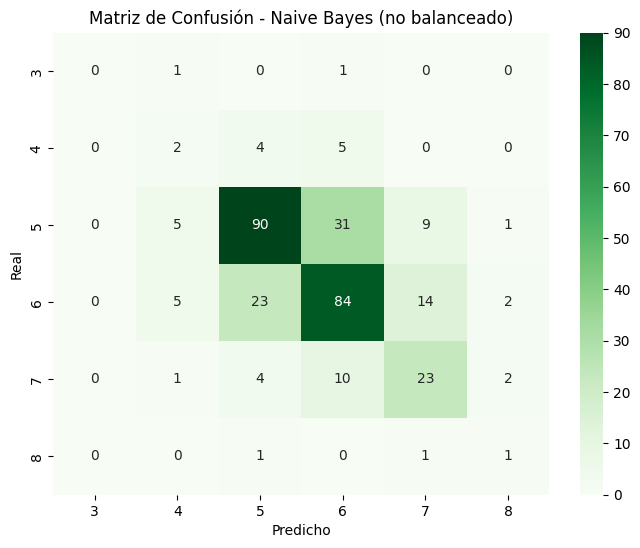

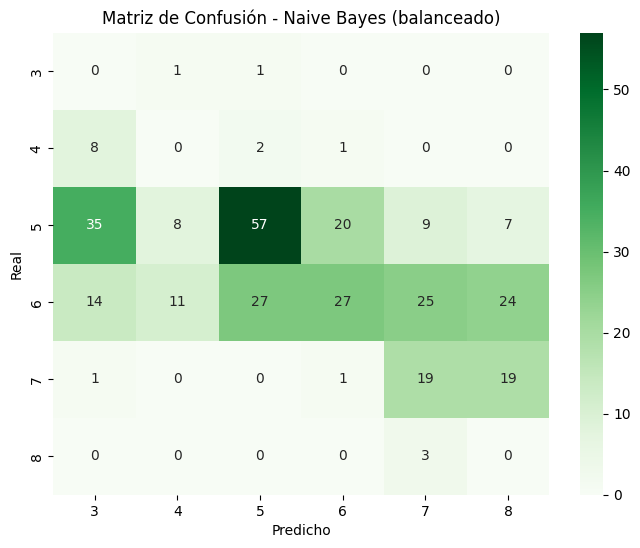

In [9]:
# Modelo Naive Bayes
nb=GaussianNB()
nb_bal = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_bal.fit(X_train_bal, y_train_bal)

# Predicciones 
y_pred_nb = nb.predict(X_test_scaled)
y_pred_nb_bal = nb_bal.predict(X_test_scaled)

# Area bajo la curva ROC
y_score_nb = nb.predict_proba(X_test_scaled)
y_score_nb_bal = nb_bal.predict_proba(X_test_scaled)
auc_nb = roc_auc_score(y_test_bin, y_score_nb, average='macro')
auc_nb_bal = roc_auc_score(y_test_bin, y_score_nb_bal, average='macro')

registrar_metricas("Naive Bayes", y_test, y_pred_nb)
print("AUC (macro): ", auc_nb)
registrar_metricas("Naive Bayes (balanceado)", y_test, y_pred_nb_bal)
print("AUC (macro): ", auc_nb_bal)

# Evaluación
print("\nReporte de clasificación :\n", classification_report(y_test, y_pred_nb))
print("\nReporte de clasificación (balanceado):\n", classification_report(y_test, y_pred_nb_bal))

# Validación cruzada en el set balanceado
scores_nb = cross_val_score(nb, X_train, y_train, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, no balanceado):", scores_nb.mean())
scores_nb_bal = cross_val_score(nb_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, balanceado):", scores_nb_bal.mean())

# Matrices de confusión ---
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.sort(np.unique(y)),
            yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Naive Bayes (no balanceado)")
plt.show()

cm_bal = confusion_matrix(y_test, y_pred_nb_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.sort(np.unique(y)),
            yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Naive Bayes (balanceado)")
plt.show()


# LDA


--- LDA ---
Accuracy: 0.4
Precision (macro):  0.2721001231430087
Recall (macro):  0.24644886363636365
F1-score (macro):  0.2411305550936803
AUC (macro):  0.7367112794947491

Reporte de clasificación (LDA balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.04      0.18      0.06        11
           5       0.70      0.50      0.58       136
           6       0.54      0.30      0.38       128
           7       0.36      0.50      0.42        40
           8       0.00      0.00      0.00         3

    accuracy                           0.40       320
   macro avg       0.27      0.25      0.24       320
weighted avg       0.56      0.40      0.46       320

Accuracy medio CV (5 folds, LDA balanceado): 0.5553516819571864


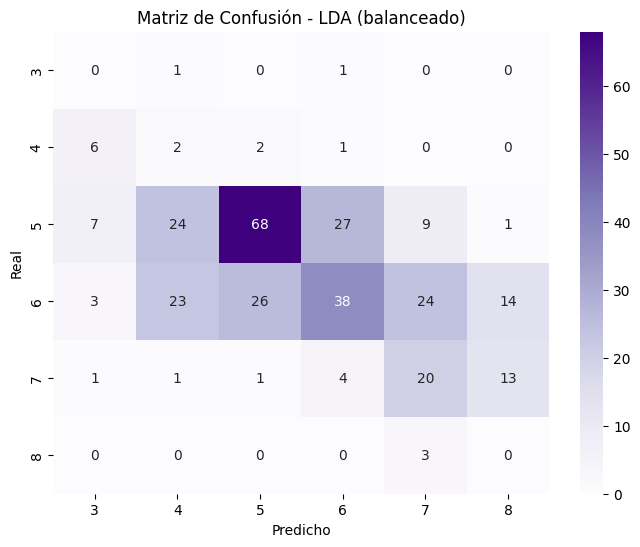

In [10]:
# Modelo LDA 
lda_bal = LinearDiscriminantAnalysis()
lda_bal.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lda_bal = lda_bal.predict(X_test_scaled)

# Area bajo la curva ROC
y_score_lda_bal = lda_bal.predict_proba(X_test_scaled)
auc_lda_bal = roc_auc_score(y_test_bin, y_score_lda_bal, average='macro')

#Metricas
registrar_metricas("LDA", y_test, y_pred_lda_bal)
print("AUC (macro): ", auc_lda_bal)

# Evaluación 
print("\nReporte de clasificación (LDA balanceado):\n", classification_report(y_test, y_pred_lda_bal))

# Validación cruzada en el set balanceado
scores_lda_bal = cross_val_score(lda_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, LDA balanceado):", scores_lda_bal.mean())

# Matriz de confusión 
cm_lda_bal = confusion_matrix(y_test, y_pred_lda_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_lda_bal, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.sort(np.unique(y)),
            yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - LDA (balanceado)")
plt.show()

# QDA


--- QDA ---
Accuracy: 0.4
Precision (macro):  0.2721001231430087
Recall (macro):  0.24644886363636365
F1-score (macro):  0.2411305550936803
AUC (macro):  0.7172896298689038

Reporte de clasificación (QDA balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.04      0.18      0.06        11
           5       0.70      0.50      0.58       136
           6       0.54      0.30      0.38       128
           7       0.36      0.50      0.42        40
           8       0.00      0.00      0.00         3

    accuracy                           0.40       320
   macro avg       0.27      0.25      0.24       320
weighted avg       0.56      0.40      0.46       320

Accuracy medio CV (5 folds, QDA balanceado): 0.6770642201834862


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0

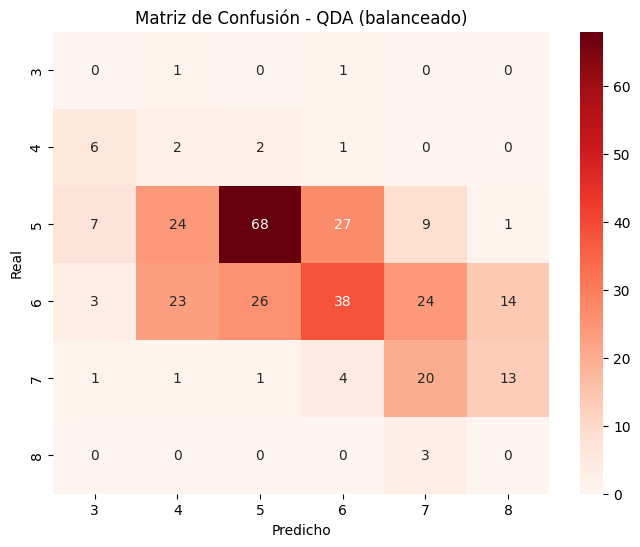

In [11]:
# Modelo QDA 
qda_bal = QuadraticDiscriminantAnalysis()
qda_bal.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_qda_bal = lda_bal.predict(X_test_scaled)

# Area bajo la curva ROC
y_score_qda_bal = qda_bal.predict_proba(X_test_scaled)
auc_qda_bal = roc_auc_score(y_test_bin, y_score_qda_bal, average='macro')

#Metricas
registrar_metricas("QDA", y_test, y_pred_qda_bal)
print("AUC (macro): ", auc_qda_bal)

# Evaluación 
print("\nReporte de clasificación (QDA balanceado):\n", classification_report(y_test, y_pred_qda_bal))

# Validación cruzada en el set balanceado
scores_qda_bal = cross_val_score(qda_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, QDA balanceado):", scores_qda_bal.mean())

# Matriz de confusión 
cm_qda_bal = confusion_matrix(y_test, y_pred_qda_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_qda_bal, annot=True, fmt="d", cmap="Reds",
            xticklabels=np.sort(np.unique(y)),
            yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - QDA (balanceado)")
plt.show()



# BOXPLOTS COMPARATIVOS

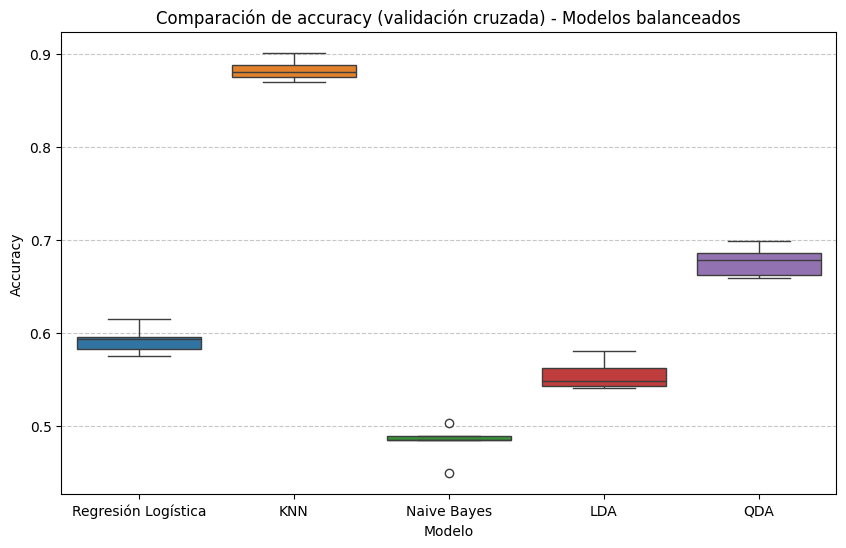

In [12]:
# Guardo los resultados de validación cruzada de cada modelo balanceado para el boxplot posterior
scores_logreg_bal = scores_log_bal   # Regresión logística balanceada
scores_bal_knn = scores_knn_bal # KNN balanceado
scores_bal_nb = scores_nb_bal # Naive Bayes balanceado
scores_bal_lda = scores_lda_bal # LDA balanceado
scores_bal_qda = scores_qda_bal # QDA balanceado

# Creamos DataFrame para boxplot
results = pd.DataFrame({
    'Regresión Logística': scores_log_bal ,  
    'KNN': scores_bal_knn,              
    'Naive Bayes': scores_bal_nb,       
    'LDA': scores_bal_lda,              
    'QDA': scores_bal_qda               
})

plt.figure(figsize=(10,6))
sns.boxplot(data=results)
plt.title('Comparación de accuracy (validación cruzada) - Modelos balanceados')
plt.ylabel('Accuracy')
plt.xlabel('Modelo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



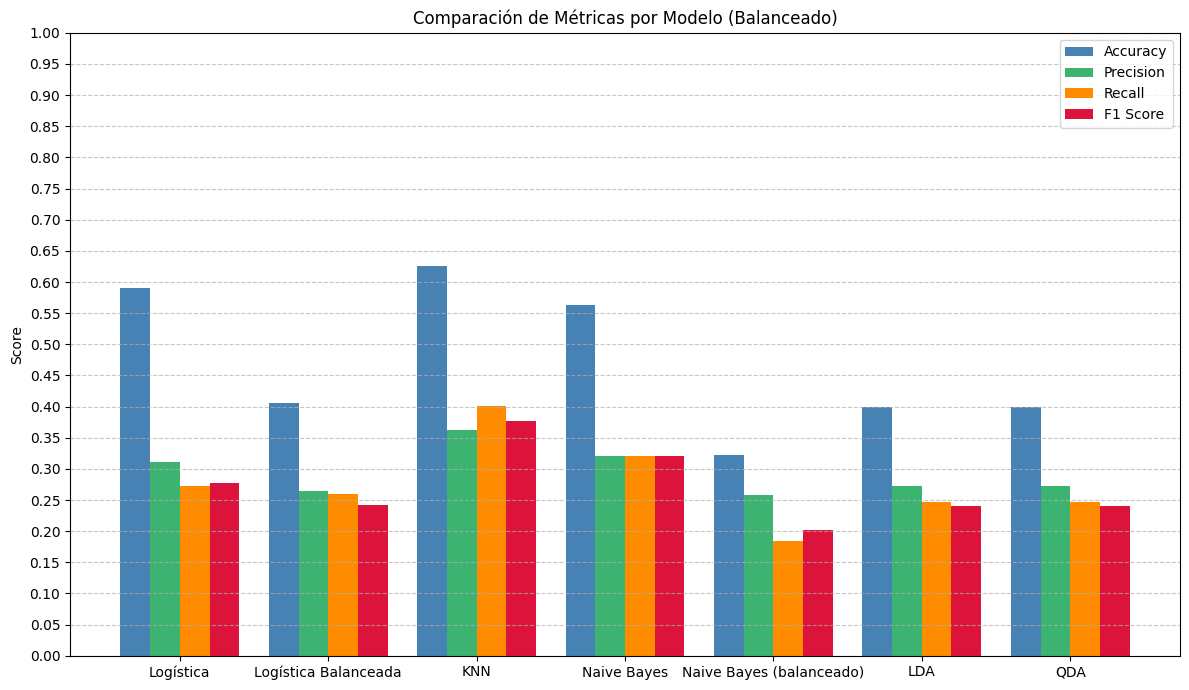

In [13]:
# Extrae métricas del diccionario registrado 
modelos = list(metricas_modelos.keys())
accuracy = [metricas_modelos[m]["Accuracy"] for m in modelos]
precision = [metricas_modelos[m]["Precision"] for m in modelos]
recall = [metricas_modelos[m]["Recall"] for m in modelos]
f1_score_vals = [metricas_modelos[m]["F1 Score"] for m in modelos]

# Preparar gráfico agrupado 
x = np.arange(len(modelos))  # posiciones de los modelos
width = 0.2  # ancho de cada barra

plt.figure(figsize=(12, 7))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='steelblue')
plt.bar(x - 0.5*width, precision, width, label='Precision', color='mediumseagreen')
plt.bar(x + 0.5*width, recall, width, label='Recall', color='darkorange')
plt.bar(x + 1.5*width, f1_score_vals, width, label='F1 Score', color='crimson')

# Personalización del eje Y 
plt.xticks(x, modelos)
plt.yticks(np.arange(0, 1.05, 0.05))  

plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Comparación de Métricas por Modelo (Balanceado)")
plt.legend(loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()